In [82]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (5,5)
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [5]:
cwd = os.getcwd()
data = pd.read_csv(cwd+'/datasets/LRGradientDescentImpl/train.csv')

In [105]:
x = data['GrLivArea']
y = data['SalePrice']

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] # since x1 is 1 in cost function, so we concatenate it to x matrix

In [30]:
#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta) # dot product of each row of x matrix with the two elements of theta
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error) # we need to square the term, but since this is matrix, we use the dot notation and inverse the error matrix 
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

In [73]:
alpha = 0.01 #Step size/learning rate
iterations = 2000 #No. of iterations # experiment with diff values, the theta(and cost fun) show very minute changes even after changing iterations by thousands
m = y.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with

#Pass the relevant variables to the function and get the new values back...
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1] # to get the final value of theta after given iterations

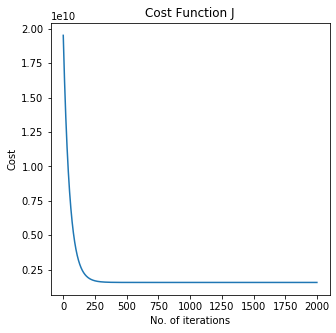

In [83]:
#Plot the cost function, from here you can see that exactly after 250th iteration we reached the minima, the next iterations do not produce any major difference
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()